# Setup technical

In [1]:
import os
org = os.getcwd()

head_of_path, the_tail = os.path.split(org)

if the_tail == 'notebooks':
    os.chdir(head_of_path)
os.getcwd()

'C:\\Users\\Mike Ulm\\code\\countryborder_python'

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

import countryborder as cb

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Setup networks

## Get gdf_raw as a safety net

In [4]:
geojson_file = 'src_data/data/countries.geojson'

# Read the GeoJSON file into a GeoDataFrame
gdf_raw = gpd.read_file(geojson_file)


## Process gdf, a copy of gdf_raw

In [5]:
gdf = gdf_raw.copy(deep=True)
gdf = cb.tidy_data(gdf)

In [6]:
gdf = cb.add_centroid(gdf)

C:\Users\Mike Ulm\code\countryborder_python\countryborder\tidy_data.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf['geometry'].centroid


In [7]:
G = cb.create_country_network(gdf, 'ADMIN')
print('Done creating network')

Done creating network


# Show what can be done network G

## Show all countries on map

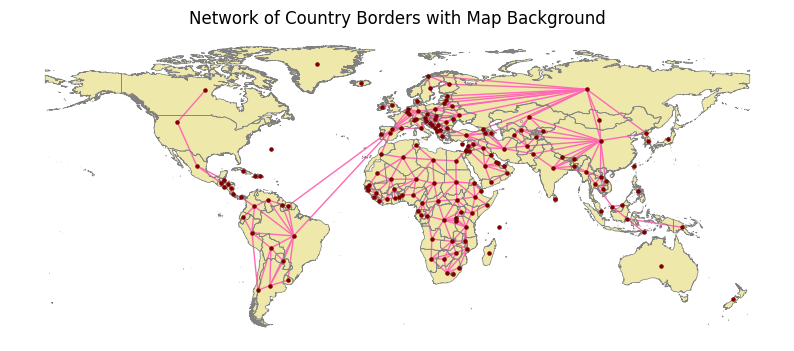

In [8]:
cb.plot_country_network_on_map(gdf, G)

## Show a country and its neighbors

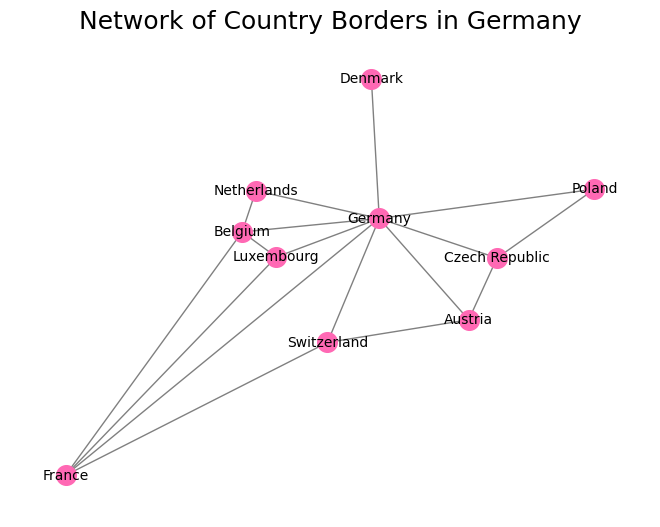

In [9]:
cb.plot_a_country_borders(G,'Germany')

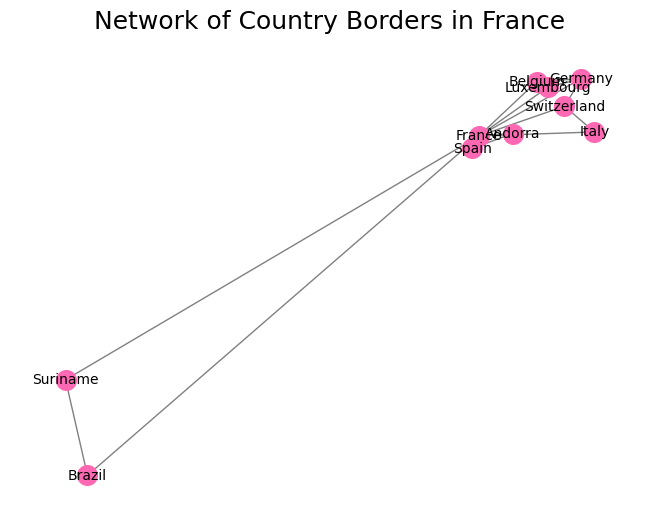

In [10]:
cb.plot_a_country_borders(G,'France')

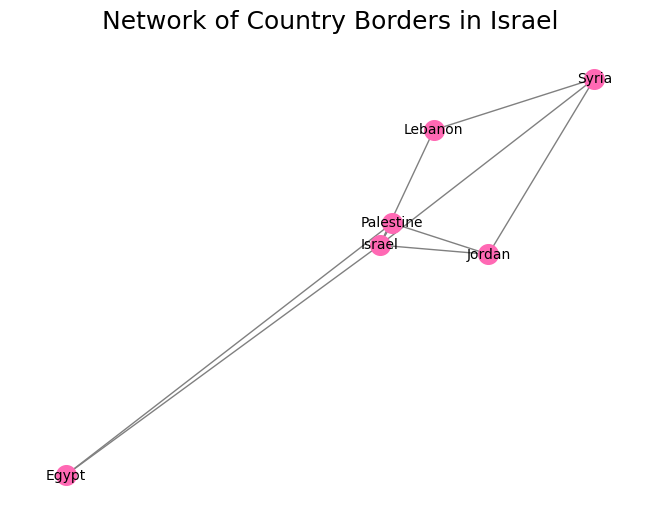

In [11]:
cb.plot_a_country_borders(G,'Israel')

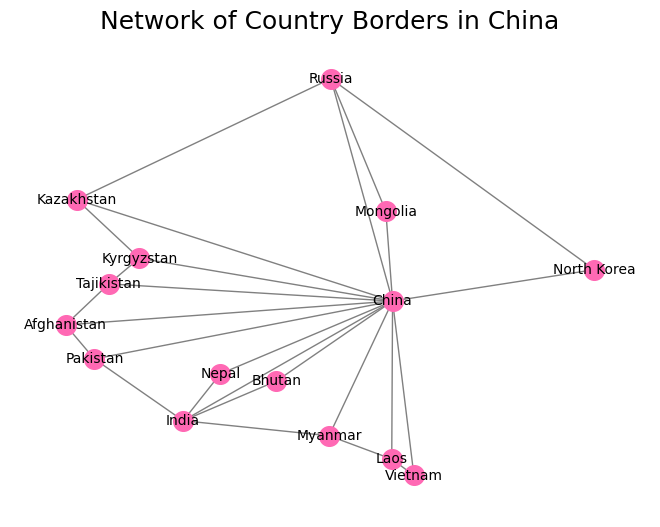

In [12]:
cb.plot_a_country_borders(G,'China')

## Counties with the most borders

In [13]:
cb.calculate_top_border_countries(G, 10)

China (14 borders): Afghanistan, Bhutan, India, Kazakhstan, Kyrgyzstan, Laos, Myanmar, Mongolia, Nepal, Pakistan, North Korea, Russia, Tajikistan, Vietnam
Russia (14 borders): Azerbaijan, Belarus, China, Estonia, Finland, Georgia, Kazakhstan, Lithuania, Latvia, Mongolia, Norway, Poland, North Korea, Ukraine
Brazil (10 borders): Argentina, Bolivia, Colombia, France, Guyana, Peru, Paraguay, Suriname, Uruguay, Venezuela
Democratic Republic of the Congo (9 borders): Angola, Burundi, Central African Republic, Republic of Congo, Rwanda, South Sudan, United Republic of Tanzania, Uganda, Zambia
Germany (9 borders): Austria, Belgium, Switzerland, Czech Republic, Denmark, France, Luxembourg, Netherlands, Poland
France (9 borders): Andorra, Belgium, Brazil, Switzerland, Germany, Spain, Italy, Luxembourg, Suriname
Austria (8 borders): Switzerland, Czech Republic, Germany, Hungary, Italy, Liechtenstein, Slovakia, Slovenia
Turkey (8 borders): Armenia, Azerbaijan, Bulgaria, Georgia, Greece, Iran, Ira

## Shortest path between two countries

In [14]:
cb.find_shortest_path_between_countries(G, 'Israel', 'Finland')

Minimum number of borders to go from Israel to Finland : 5
Countries to cross:
Israel -> Syria
Syria -> Turkey
Turkey -> Azerbaijan
Azerbaijan -> Russia
Russia -> Finland


In [15]:
cb.find_shortest_path_between_countries(G, 'China', 'Canada')

Minimum number of borders to go from China to Canada : 14
Countries to cross:
China -> Russia
Russia -> Poland
Poland -> Germany
Germany -> France
France -> Brazil
Brazil -> Colombia
Colombia -> Panama
Panama -> Costa Rica
Costa Rica -> Nicaragua
Nicaragua -> Honduras
Honduras -> Guatemala
Guatemala -> Mexico
Mexico -> United States of America
United States of America -> Canada


# Examine the gdf file

In [16]:
gdf.tail(40)

,ADMIN,ISO_A3,ISO_A2,geometry,latitude,longitude
190,Romania,ROU,RO,"MULTIPOLYGON (((26.72238 48.25977, 26.73313 48...",45.853464,24.972942
191,Russia,RUS,RU,"MULTIPOLYGON (((132.44899 42.84540, 132.44988 ...",61.984555,96.693761
192,Rwanda,RWA,RW,"MULTIPOLYGON (((30.47179 -1.06684, 30.46386 -1...",-1.992751,29.919061
194,Saudi Arabia,SAU,SA,"MULTIPOLYGON (((41.89847 16.75148, 41.90514 16...",24.122327,44.536864
196,Sudan,SDN,SD,"MULTIPOLYGON (((37.26450 20.74999, 37.25441 20...",15.986881,29.939618
197,South Sudan,SSD,SS,"MULTIPOLYGON (((33.96912 9.83834, 33.90489 9.7...",7.283531,30.301120
198,Senegal,SEN,SN,"MULTIPOLYGON (((-14.91250 16.64064, -14.88201 ...",14.367789,-14.471306
200,Singapore,SGP,SG,"MULTIPOLYGON (((103.96079 1.39110, 103.98569 1...",1.358921,103.813468
204,Sierra Leone,SLE,SL,"MULTIPOLYGON (((-12.59586 7.61274, -12.58605 7...",8.563086,-11.795016
205,El Salvador,SLV,SV,"MULTIPOLYGON (((-87.69700 13.17806, -87.69319 ...",13.735849,-88.870923
